<a href="https://colab.research.google.com/github/utkarshg1/Neural-Net-Datasets/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis - Resturaunt Reviews

In [3]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/Restaurant_Reviews.tsv"
df = pd.read_csv(url, sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
import re
def preprocess_text(st):
  # Convert statement to lower case
  st = st.lower()
  # Remove the punctuation marks and symbols
  st = re.sub("[^a-z ]","",st)
  return st

In [7]:
preprocess_text('Hi All!, Welcome to Deep Learning Classes ....')

'hi all welcome to deep learning classes '

In [8]:
df['Review_pre'] = df['Review'].apply(preprocess_text)

In [9]:
df.head()

,Review,Liked,Review_pre
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...


### Apply TFIDV Vectorizer on preprocessed Data

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
X = tf.fit_transform(df['Review_pre']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
X.shape

(1000, 2046)

In [12]:
Y = df['Liked']
Y.head()

0    1
1    0
2    0
3    1
4    1
Name: Liked, dtype: int64

# Build a neural network

In [15]:
X.shape[1]

2046

### Apply Train test split

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=21)

In [17]:
xtrain.shape

(800, 2046)

In [18]:
xtest.shape

(200, 2046)

### Building neural network

In [20]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping

In [21]:
model = Sequential()

# Add an input layer
model.add(Input(shape=(xtrain.shape[1],)))
# Create a Dense Layer 1
model.add(Dense(units=128, activation='relu'))
# Add dropout layer Layer 1
model.add(Dropout(rate=0.5))
# Add Dense Layer 2
model.add(Dense(units=64, activation='relu'))
# Add Dropout layer 2
model.add(Dropout(rate=0.4))
# model output layer
model.add(Dense(units=1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               262016    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 270337 (1.03 MB)
Trainable params: 270337 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
es = EarlyStopping(monitor='val_loss', patience=15)

In [25]:
hist = model.fit(xtrain, ytrain, validation_split=0.1, epochs=200, callbacks=[es])

Epoch 1/200
23/23 [==============================] - 3s 33ms/step - loss: 0.6912 - accuracy: 0.5472 - val_loss: 0.6965 - val_accuracy: 0.3750
Epoch 2/200
23/23 [==============================] - 0s 18ms/step - loss: 0.6764 - accuracy: 0.6264 - val_loss: 0.6943 - val_accuracy: 0.4000
Epoch 3/200
23/23 [==============================] - 0s 19ms/step - loss: 0.6402 - accuracy: 0.7139 - val_loss: 0.6619 - val_accuracy: 0.5750
Epoch 4/200
23/23 [==============================] - 0s 20ms/step - loss: 0.5456 - accuracy: 0.8833 - val_loss: 0.5816 - val_accuracy: 0.7000
Epoch 5/200
23/23 [==============================] - 0s 21ms/step - loss: 0.3799 - accuracy: 0.9194 - val_loss: 0.4811 - val_accuracy: 0.7750
Epoch 6/200
23/23 [==============================] - 1s 24ms/step - loss: 0.2339 - accuracy: 0.9472 - val_loss: 0.4385 - val_accuracy: 0.7500
Epoch 7/200
23/23 [==============================] - 1s 24ms/step - loss: 0.1287 - accuracy: 0.9806 - val_loss: 0.4908 - val_accuracy: 0.7500
Epoch 

In [26]:
model.evaluate(xtrain, ytrain)

25/25 [==============================] - 0s 10ms/step - loss: 0.0777 - accuracy: 0.9700


[0.07765451073646545, 0.9700000286102295]

In [27]:
model.evaluate(xtest, ytest)

7/7 [==============================] - 0s 7ms/step - loss: 0.5675 - accuracy: 0.8150


[0.567478358745575, 0.8149999976158142]

### Performing predictions on train and test

In [28]:
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

7/7 [==============================] - 0s 6ms/step


In [29]:
yprob_train[0:5]

array([[9.9576902e-01],
       [9.9991727e-01],
       [9.9999923e-01],
       [3.1001175e-05],
       [1.4357823e-04]], dtype=float32)

In [30]:
yprob_test[0:5]

array([[4.6894323e-02],
       [1.7201678e-04],
       [9.9647564e-01],
       [9.9993801e-01],
       [9.9996537e-01]], dtype=float32)

In [31]:
ypred_train = [1 if prob>=0.5 else 0 for prob in yprob_train]
ypred_test = [1 if prob>=0.5 else 0 for prob in yprob_test]

In [32]:
ypred_train[0:5]

[1, 1, 1, 0, 0]

In [33]:
ytrain.head()

108    1
134    1
585    1
42     0
990    0
Name: Liked, dtype: int64

In [34]:
ypred_test[0:5]

[0, 0, 1, 1, 1]

In [35]:
ytest.head()

492    0
383    0
856    1
834    1
603    1
Name: Liked, dtype: int64

### Evaluate model

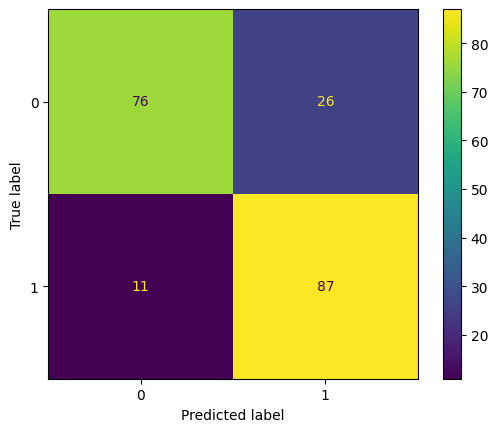

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

In [39]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.87      0.75      0.80       102
           1       0.77      0.89      0.82        98

    accuracy                           0.81       200
   macro avg       0.82      0.82      0.81       200
weighted avg       0.82      0.81      0.81       200



### Save the model for future use

In [40]:
model.save('SentimentRest.keras')

### Loading model for future use

In [42]:
from keras.models import load_model

In [43]:
n = load_model('/content/SentimentRest.keras')
n.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               262016    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 270337 (1.03 MB)
Trainable params: 270337 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Predicting own sentiments

In [46]:
def predict_sentiment():
  st = input('Please enter a review : ')
  # Preproceses the text
  st1 = preprocess_text(st)
  # Apply TFIDF vectorizer
  st_pre = tf.transform([st1]).toarray()
  # Perform the prediction
  prob = model.predict([st_pre])
  # If prob>=0.5 then positive else negative
  if prob>=0.5:
    print('Given statement is POSITIVE')
  else:
    print('Given statement is NEGATIVE')
  return prob


In [47]:
predict_sentiment()

Please enter a review : Wow , Its just an amazing place, Really liked the ambience
1/1 [==============================] - 0s 127ms/step
Given statement is POSITIVE


array([[0.9999122]], dtype=float32)

In [48]:
predict_sentiment()

Please enter a review : Bad Place, I really hated the taste of the food!....
1/1 [==============================] - 0s 31ms/step
Given statement is NEGATIVE


array([[0.02049457]], dtype=float32)

In [50]:
predict_sentiment()

Please enter a review : The pizza was really good
1/1 [==============================] - 0s 27ms/step
Given statement is POSITIVE


array([[0.99909884]], dtype=float32)